# Project

In [6]:
from a_load import extract_dataset, clean_text, load_dataset
from b_model import train_sentiment_model
from c_mix_review import find_mixed_reviews
from d_visualisation import visualize_mixed_review

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Chargement des données d'entraînement...
Chargement des données de test...
Forme des données d'entraînement: (25000, 2)
Forme des données de test: (25000, 2)
Nettoyage des données textuelles...
Extraction de caractéristiques avec TF-IDF...
Entraînement du modèle de régression logistique...

Recherche des critiques mitigées...

Nombre de critiques mitigées trouvées: 3598

Exemples de critiques mitigées :

--- Critique mitigée #1 ---
Proportion positive: 0.60, Proportion négative: 0.40
Phrases positives: 3, Phrases négatives: 2

Phrases et leurs sentiments :
Phrase 1 (neutre, prob_pos=0.64): Even if you're a fan of Jean Rollin's idiosyncratic body of work, you will be caught off guard by th...
Phrase 2 (négatif, prob_pos=0.26): For once, there's not a single diaphanously gowned vampire girl in sight !
Phrase 3 (neutre, prob_pos=0.69): True to tradition, the budget proved way too tight to realize the director's vision entirely.
Phrase 4 (positif, prob_pos=0.70): Yet this is largely compen

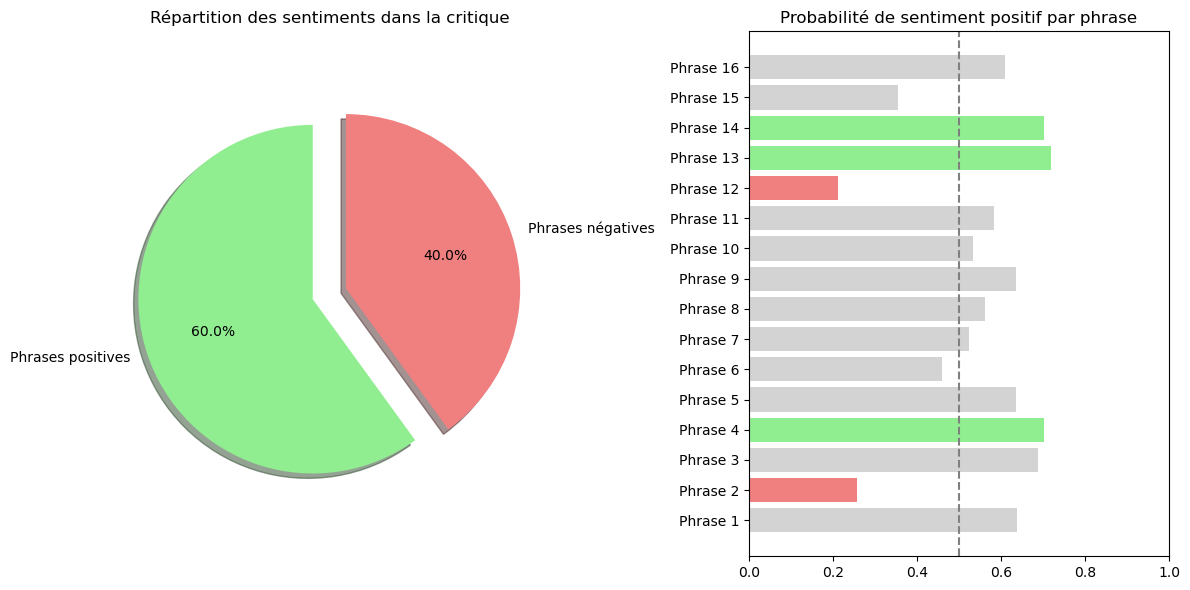


Critique complète:
Even if you're a fan of Jean Rollin's idiosyncratic body of work, you will be caught off guard by this exceptional foray into science fiction territory. For once, there's not a single diaphanously gowned vampire girl in sight ! True to tradition, the budget proved way too tight to realize the director's vision entirely. Yet this is largely compensated by his obvious love of genre cinema, dedication to his craft and sheer ingenuity. Jean-Claude Couty's atmospheric cinematography makes the most of the foreboding locations and Philippe Bréjean (a/k/a "Gary Sandeur") contributes a startling soundtrack that fortunately doesn't resemble any of the sappy stuff he composed for hardcore.<br /><br />Shot in and around a Paris office block before and after working hours, the film was largely cast with porn regulars Rollin was already quite familiar with from his "Michel Gentil" cash-gathering XXX efforts, most notably French f*ck film royalty Brigitte Lahaie in the demanding l

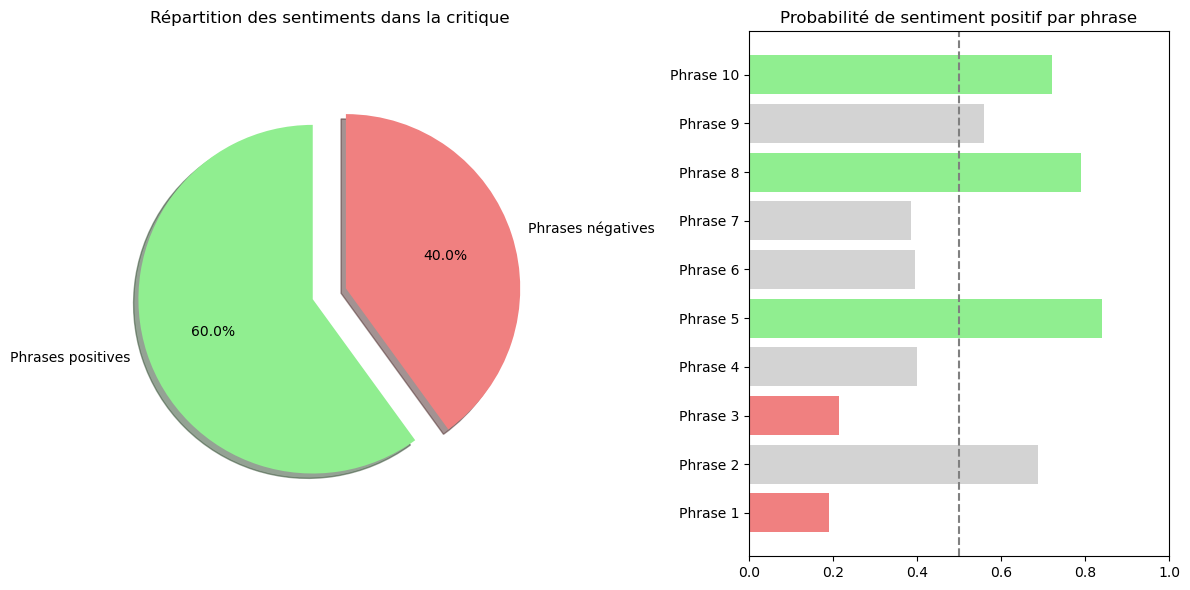


--- Critique mitigée #3 ---
Proportion positive: 0.50, Proportion négative: 0.50
Phrases positives: 2, Phrases négatives: 2

Phrases et leurs sentiments :
Phrase 1 (positif, prob_pos=0.92): It's true that "They Died With Their Boots On" gives a highly fictionalized account of George Armstr...
Phrase 2 (neutre, prob_pos=0.56): Because it is not a given that a 1941 movie tries to portray both the US-American cavalryman and Nat...
Phrase 3 (neutre, prob_pos=0.37): I'm almost tempted to say that "Little Big Man" in its unqualified anti-Custer stance seems unbalanc...
Phrase 4 (neutre, prob_pos=0.36): Further, one should not be mislead by the title of the picture  this isn't just a movie about the B...
Phrase 5 (neutre, prob_pos=0.51): During a punitive military exercise, he meets his future wife, Elizabeth Bacon (Olivia de Havilland)...
Phrase 6 (neutre, prob_pos=0.60): Custer intends to court her, but the outbreak of the Civil War calls him away.
Phrase 7 (neutre, prob_pos=0.69): Custer

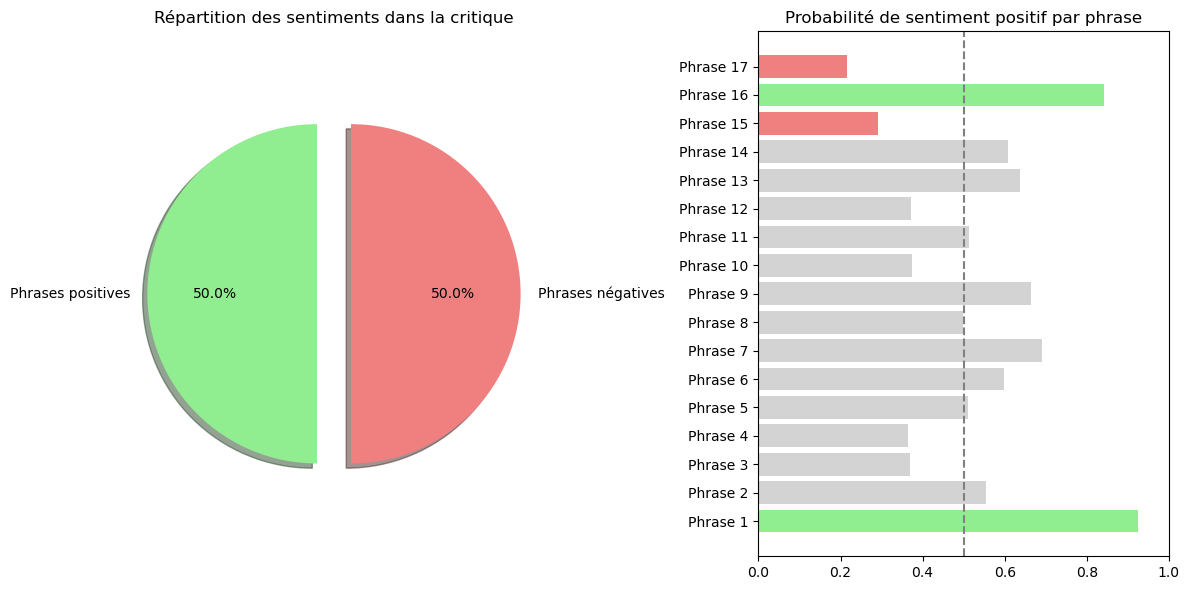


--- Critique mitigée #4 ---
Proportion positive: 0.50, Proportion négative: 0.50
Phrases positives: 5, Phrases négatives: 5

Phrases et leurs sentiments :
Phrase 1 (positif, prob_pos=0.96): This is a wonderful film as a film - it gets an 8 out of 10.
Phrase 2 (positif, prob_pos=0.75): As a filmed piece of accurate history...one wishes to be more loving, but it is a 5 out of 10.
Phrase 3 (neutre, prob_pos=0.65): And I think I am actually being very charitable.<br /><br />What was he like - that man of horse and...
Phrase 4 (neutre, prob_pos=0.49): Opinionated, militant, bumptious, bloody-handed, ambitious, clever, too-clever, Indian-foe, Indian-f...
Phrase 5 (neutre, prob_pos=0.40): ), and national hero.
Phrase 6 (neutre, prob_pos=0.63): His death in 1876 was treated as a national tragedy and pushed him into a position of fame equal to ...
Phrase 7 (neutre, prob_pos=0.57): It is only with a growing awareness of the mistakes made in his career - the overly ambitious hot-sp...
Phrase 8 (

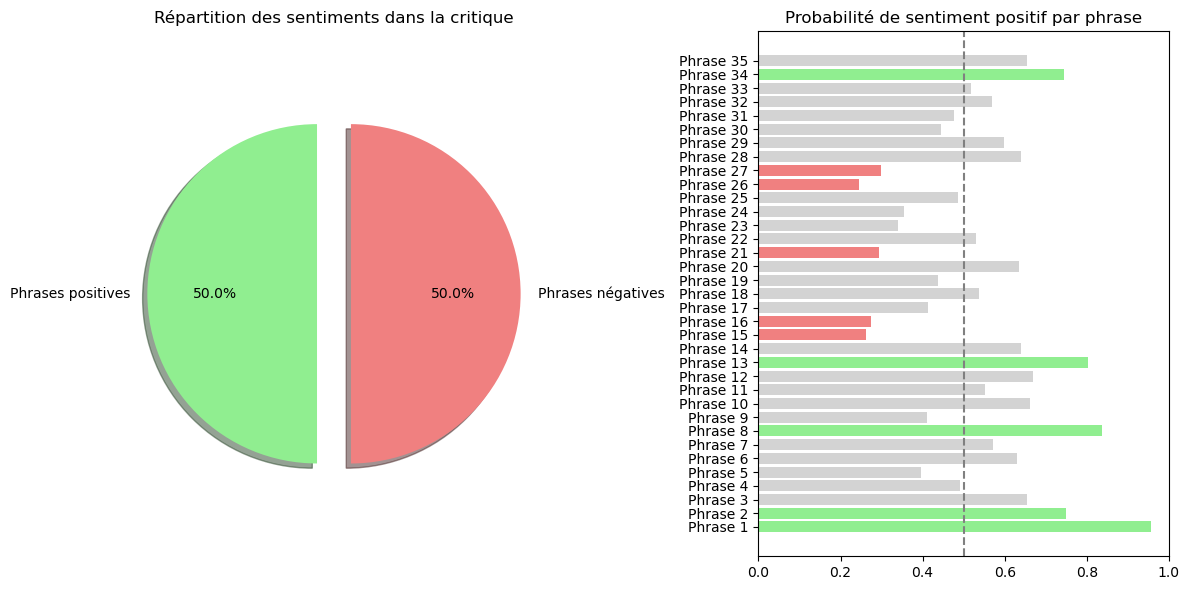


--- Critique mitigée #5 ---
Proportion positive: 0.57, Proportion négative: 0.43
Phrases positives: 4, Phrases négatives: 3

Phrases et leurs sentiments :
Phrase 1 (négatif, prob_pos=0.24): Nikki Finn is the kind of girl I would marry.
Phrase 2 (négatif, prob_pos=0.29): Never boring, always thinking positively, good with animals.
Phrase 3 (négatif, prob_pos=0.26): Okay, as one reviewer wrote, a bit too much peroxide, lipstick, and eyebrows (Only Madonna could get...
Phrase 4 (positif, prob_pos=0.78): But that's why I love Nikki Finn, she's not your ordinary girl.
Phrase 5 (positif, prob_pos=0.95): She makes things happen, always exciting to be around, and always honest.
Phrase 6 (neutre, prob_pos=0.52): Sure, she steals, but she doesn't rob or murder (unless you're out to do her in).
Phrase 7 (neutre, prob_pos=0.67): She knows which rules can be broken and which ones should be obeyed.
Phrase 8 (neutre, prob_pos=0.55): She knows what to take and what can't be stolen.
Phrase 9 (neutre, 

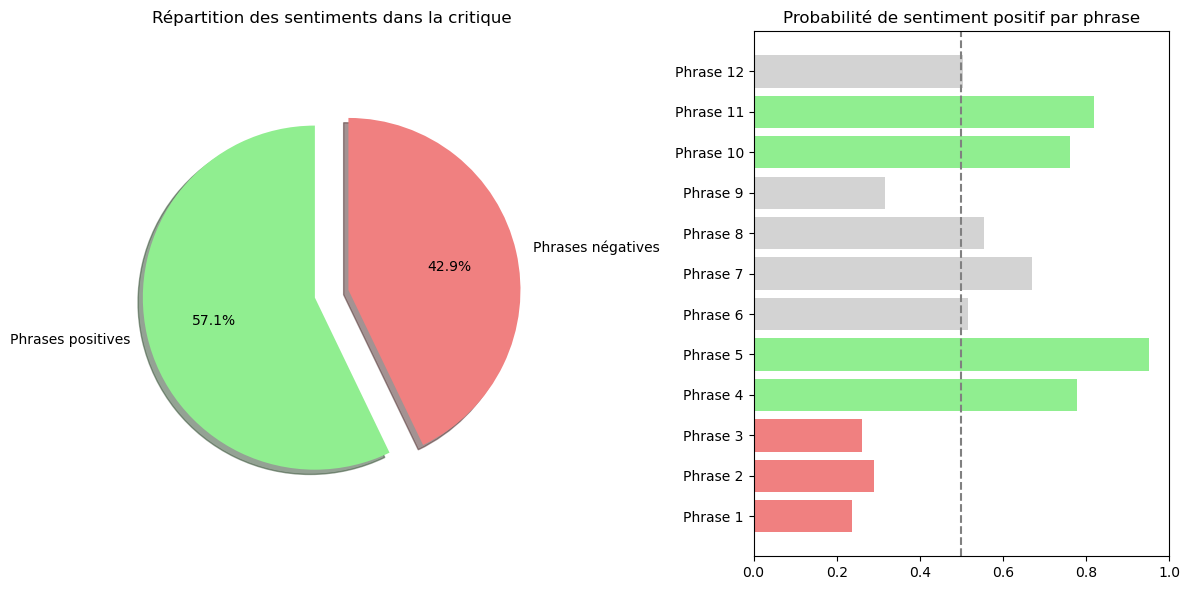


Les critiques mitigées ont été sauvegardées dans 'mixed_reviews.csv'


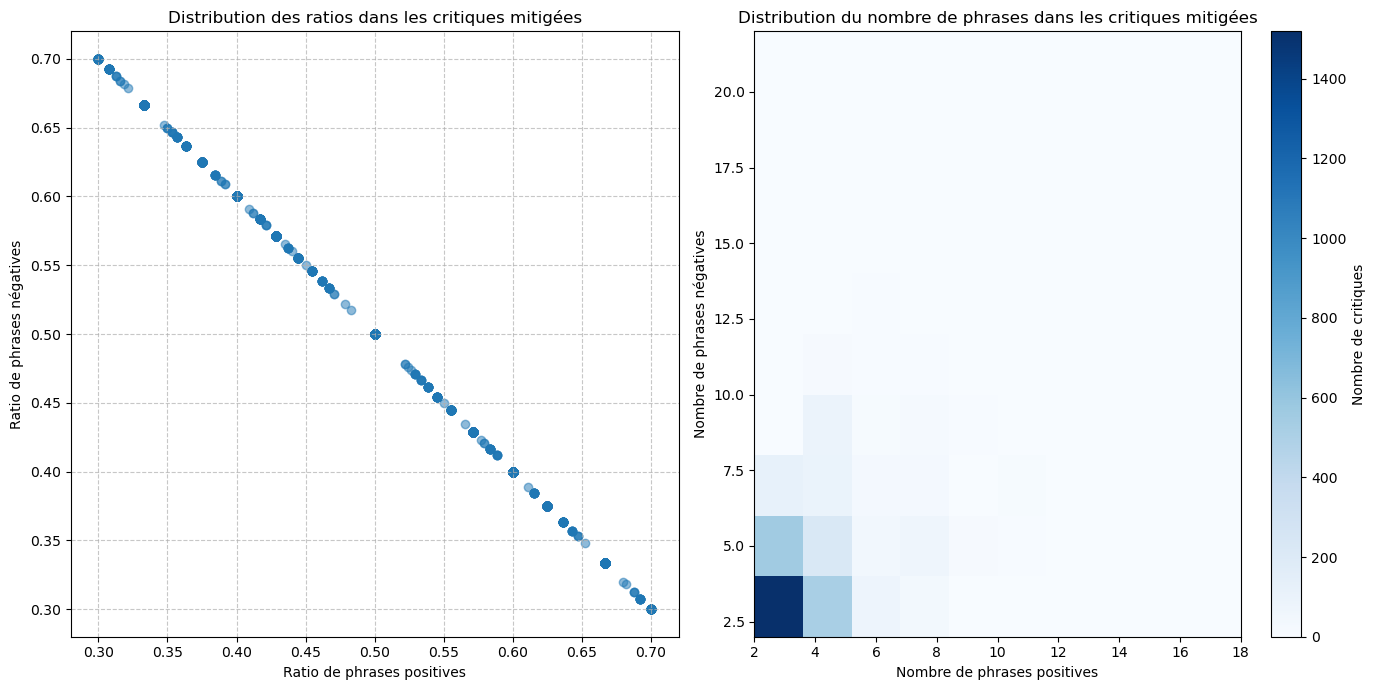

In [7]:
def main():
    tar_path = 'aclImdb_v1.tar.gz'
    extract_path = '.'
    
    # Extraire le dataset si nécessaire
    if not os.path.exists(os.path.join(extract_path, 'aclImdb')):
        extract_dataset(tar_path, extract_path)
    
    # Définir les chemins
    train_path = os.path.join(extract_path, 'aclImdb', 'train')
    test_path = os.path.join(extract_path, 'aclImdb', 'test')
    
    print("Chargement des données d'entraînement...")
    train_df = load_dataset(train_path)
    print("Chargement des données de test...")
    test_df = load_dataset(test_path)
    
    print(f"Forme des données d'entraînement: {train_df.shape}")
    print(f"Forme des données de test: {test_df.shape}")
    
    # Entraîner le modèle de sentiment
    vectorizer, classifier = train_sentiment_model(train_df)
    
    # Trouver les critiques mitigées
    print("\nRecherche des critiques mitigées...")
    mixed_indices, mixed_details = find_mixed_reviews(test_df, vectorizer, classifier)
    
    print(f"\nNombre de critiques mitigées trouvées: {len(mixed_indices)}")
    
    # Afficher quelques exemples de critiques mitigées
    if mixed_details:
        print("\nExemples de critiques mitigées :")
        for i, review_detail in enumerate(mixed_details[:5]):  # Afficher les 5 premiers exemples
            print(f"\n--- Critique mitigée #{i+1} ---")
            print(f"Proportion positive: {review_detail['pos_ratio']:.2f}, Proportion négative: {review_detail['neg_ratio']:.2f}")
            print(f"Phrases positives: {review_detail['pos_count']}, Phrases négatives: {review_detail['neg_count']}")
            print("\nPhrases et leurs sentiments :")
            
            # Afficher les phrases avec leurs sentiments
            for j, (sentence, sentiment, prob) in enumerate(review_detail['sentences']):
                if len(sentence) > 100:  # Tronquer les phrases trop longues
                    sentence = sentence[:100] + "..."
                print(f"Phrase {j+1} ({sentiment}, prob_pos={prob:.2f}): {sentence}")
            
            # Visualiser la répartition des sentiments
            visualize_mixed_review(review_detail)
            
            # Afficher la critique complète pour le premier exemple seulement
            if i == 0:
                print("\nCritique complète:")
                print(review_detail['review'])
    
    # Créer un DataFrame avec toutes les critiques mitigées
    mixed_reviews_df = pd.DataFrame({
        'index': mixed_indices,
        'review': [details['review'] for details in mixed_details],
        'pos_count': [details['pos_count'] for details in mixed_details],
        'neg_count': [details['neg_count'] for details in mixed_details],
        'pos_ratio': [details['pos_ratio'] for details in mixed_details],
        'neg_ratio': [details['neg_ratio'] for details in mixed_details]
    })
    
    # Sauvegarder les résultats
    mixed_reviews_df.to_csv('mixed_reviews.csv', index=False)
    print("\nLes critiques mitigées ont été sauvegardées dans 'mixed_reviews.csv'")
    
    # Analyse des critiques mitigées
    if not mixed_reviews_df.empty:
        plt.figure(figsize=(14, 7))
        
        # Distribution des ratios positifs/négatifs
        plt.subplot(1, 2, 1)
        plt.scatter(mixed_reviews_df['pos_ratio'], mixed_reviews_df['neg_ratio'], alpha=0.5)
        plt.xlabel('Ratio de phrases positives')
        plt.ylabel('Ratio de phrases négatives')
        plt.title('Distribution des ratios dans les critiques mitigées')
        plt.grid(True, linestyle='--', alpha=0.7)
        
        # Distribution du nombre de phrases positives vs négatives
        plt.subplot(1, 2, 2)
        plt.hist2d(mixed_reviews_df['pos_count'], mixed_reviews_df['neg_count'], 
                 bins=10, cmap='Blues')
        plt.colorbar(label='Nombre de critiques')
        plt.xlabel('Nombre de phrases positives')
        plt.ylabel('Nombre de phrases négatives')
        plt.title('Distribution du nombre de phrases dans les critiques mitigées')
        
        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    main()